### Student Performance Analysis using EDA (Expolatory Data Analysis)
#### 1. Understanding the Data
#### 2. Cleaning the Data
#### 3. Analysis of Relationship

### Step 1 : Import the relevant Libraries            

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data from your local folder in csv format :
df = pd.read_csv("StudentsPerformance.csv")
# to review top 6
df.head(6)

# To review last 5 at the borrom  
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### Step : 2 - Understanding the Data

In [3]:
# Basic Looks at Data 
df.head() # default 5 rows would display

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# to check the shape to understand the size and structure of dataframe 
df.shape

(1000, 8)

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
# To check the unique data per column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [29]:
# to describe the dataframe to Get the quick statistical summary 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [60]:
df['math score'] = df['math score'].astype(float).round(3)
df['math score'] = df['math score'].astype(int)

In [62]:
df['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int32

### Step 3. Cleaning of Data 

In [11]:
# First check the NA Values for all columns
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Now drop the columns which are not necessary for this analysis
df1 = df.drop(['race/ethnicity','parental level of education'], axis = 'columns')

In [15]:
df1.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [31]:
df1['lunch'].head()

0        standard
1        standard
2        standard
3    free/reduced
4        standard
Name: lunch, dtype: object

In [9]:
df1['math score'].dtype,df1['reading score'].dtype,df1['writing score'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [9]:
# Compute the correlation matrix
score_df = df1[['math score','reading score', 'writing score']]
corr_matrix = score_df.corr()

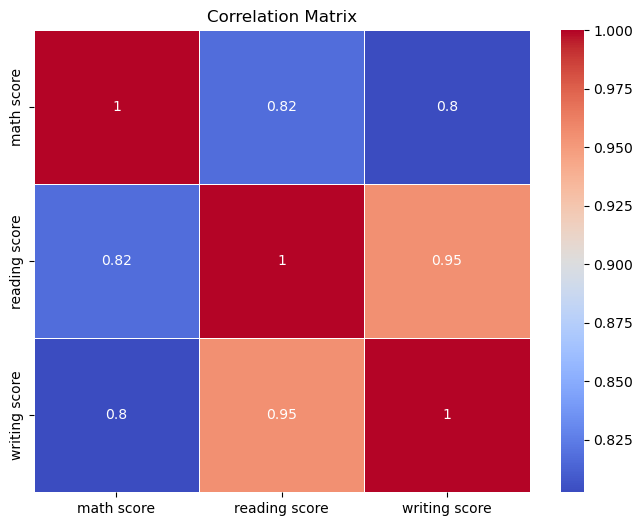

In [11]:
# Plot the HeatMap
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

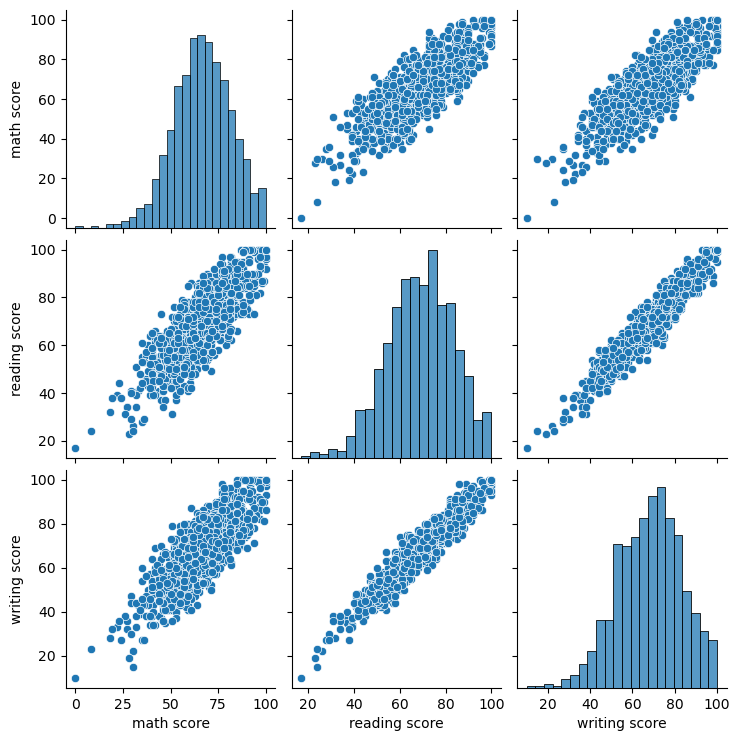

In [9]:
sns.pairplot(df1[['gender','math score', 'reading score','writing score']])

#### Step 4 : Using different plotting methods - understanding the variables relationship 

###### using Categorical vs Numerical 

In [17]:
# Storing the scores at one variable 
score_types = ['math score', 'reading score', 'writing score']

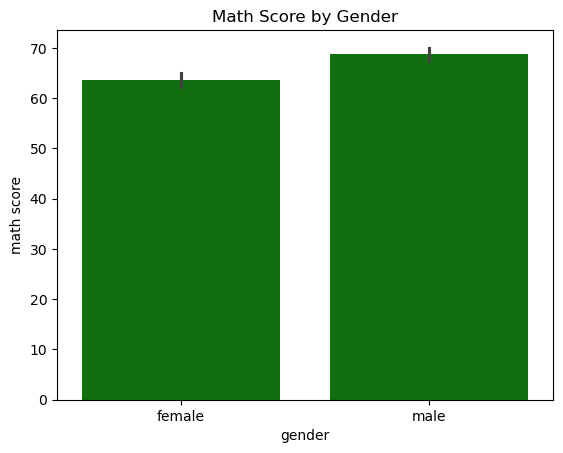

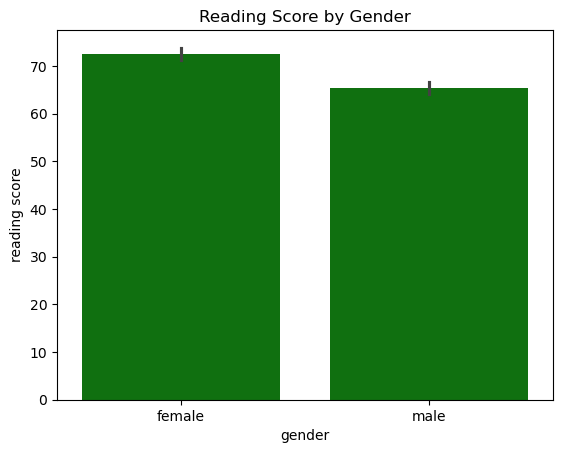

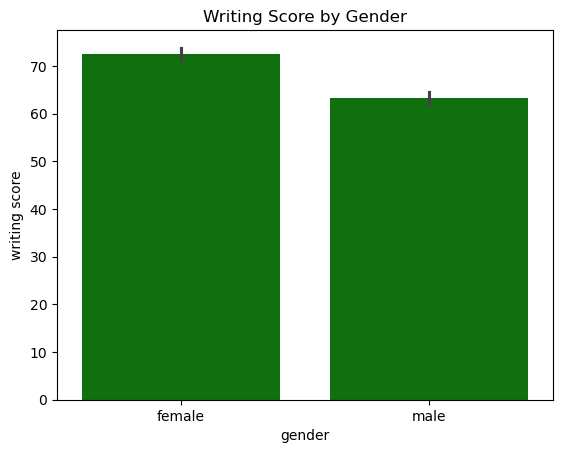

In [19]:
# Analyzing the relationship between category as gender and numericals as math, reading & writing scores:
for score in score_types:
    sns.barplot(x = 'gender', y = score , data = df1, color = 'green')
    plt.title(f'{score.title()} by Gender')
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10356\353939807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'gender', y = score, data = df1, palette = {'male':'skyblue','female': 'salmon'})


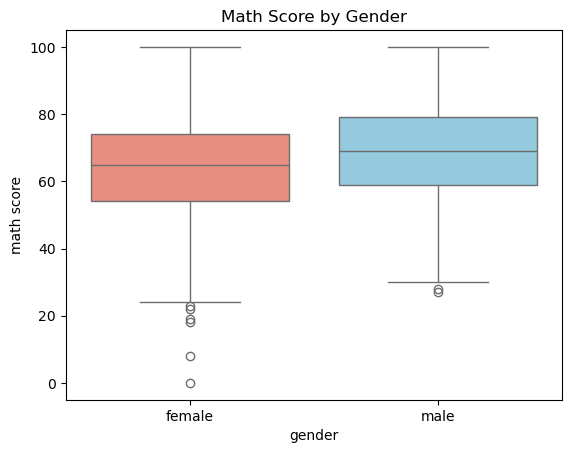

C:\Users\HP\AppData\Local\Temp\ipykernel_10356\353939807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'gender', y = score, data = df1, palette = {'male':'skyblue','female': 'salmon'})


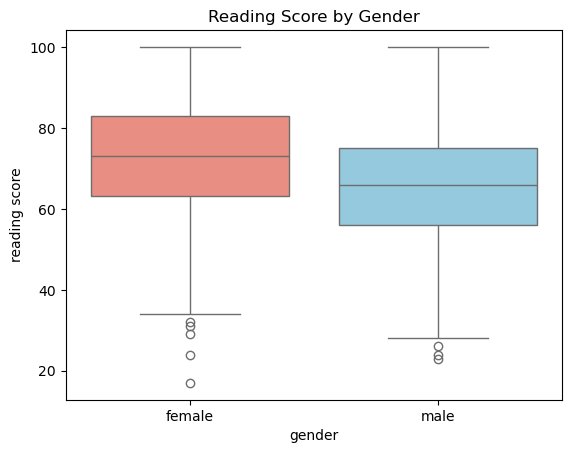

C:\Users\HP\AppData\Local\Temp\ipykernel_10356\353939807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'gender', y = score, data = df1, palette = {'male':'skyblue','female': 'salmon'})


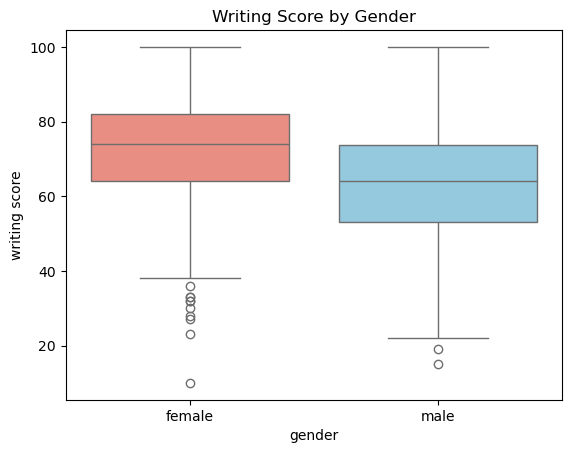

In [48]:
for score in score_types:
    sns.boxplot(x = 'gender', y = score, data = df1, palette = {'male':'skyblue','female': 'salmon'})
    plt.title(f'{score.title()} by Gender')
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16580\2048440638.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x = 'gender', y = 'math score', data = df1, ci = 'sd', palette = 'pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_16580\2048440638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'gender', y = 'math score', data = df1, ci = 'sd', palette = 'pastel')


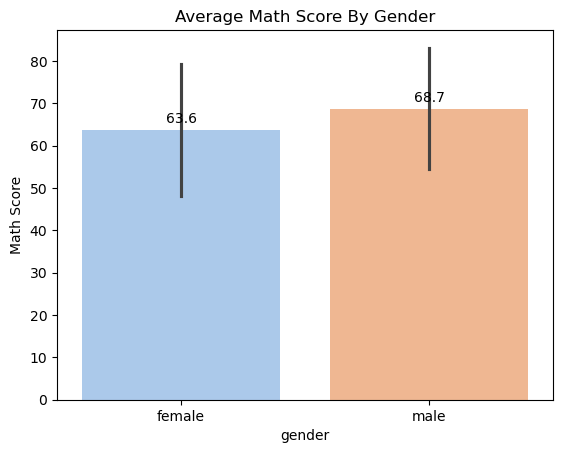

In [7]:
# Plot by score with labels by Gender :
ax = sns.barplot(x = 'gender', y = 'math score', data = df1, ci = 'sd', palette = 'pastel')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f', label_type = 'edge', padding = 3)

plt.title("Average Math Score By Gender")
plt.ylabel('Math Score')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10356\4159983029.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'gender', y = 'reading score', data = df1, palette = 'dark')


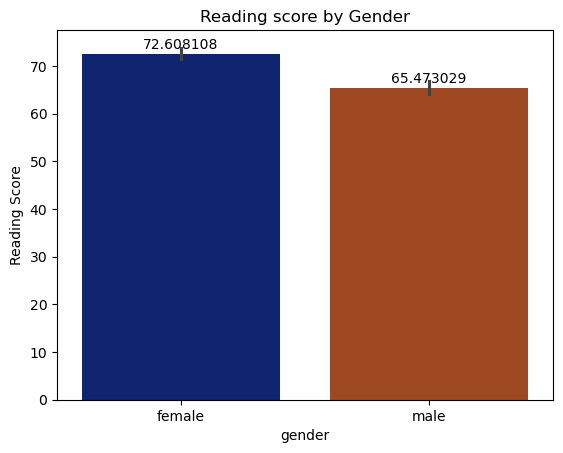

In [86]:
ax = sns.barplot(x = 'gender', y = 'reading score', data = df1, palette = 'dark')

mean_score = df1.groupby('gender')['reading score'].mean().values

for index,mean in enumerate(mean_score):
    ax.text(index,mean+1, f'{mean:1f}', ha = 'center', color = 'black')

plt.title('Reading score by Gender')
plt.ylabel('Reading Score')
plt.show()


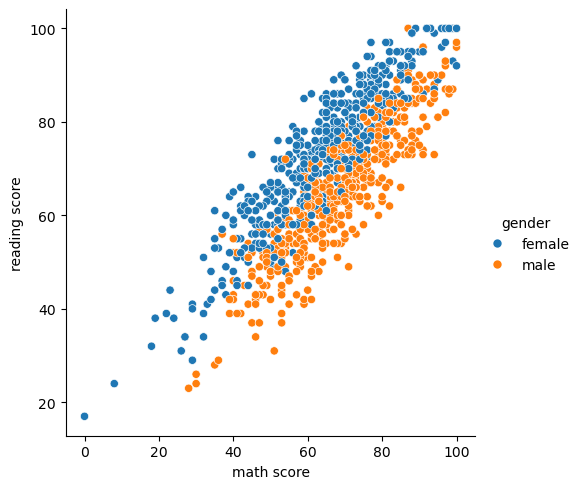

In [11]:
## to present the relationship analysis between gender and score.
sns.relplot(x = 'math score', y = 'reading score', hue = 'gender', data = df1)

##### In sns.distplot as below in which y axis density is a probablity density
##### Probability Density Function (PDF):
##### The area under the curve equals 1 (i.e., 100% of the data).

##### The y-axis shows density, not raw counts

##### if the density is 0.005 , So a height of 0.005 means: in a small interval of width w, the probability is approximately 0.005 × w.

C:\Users\HP\AppData\Local\Temp\ipykernel_16580\3794900087.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['math score'])


<Axes: xlabel='math score', ylabel='Density'>

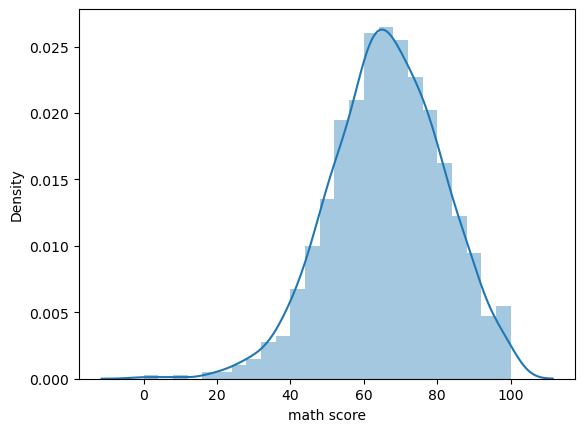

In [13]:
## To create distribution analysis 
sns.distplot(df1['math score'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16580\2756566848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

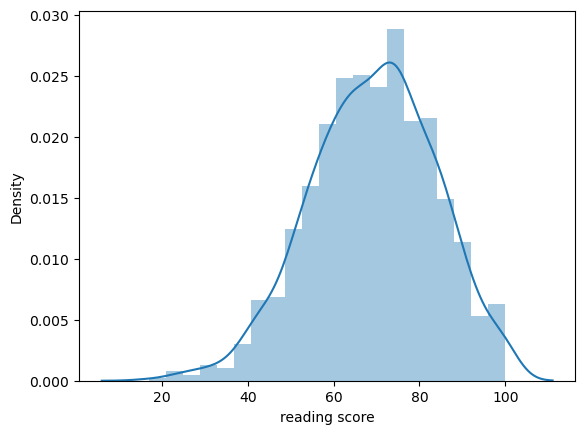

In [15]:
sns.distplot(df1['reading score'])

#### Step : 6 Categorical Plots

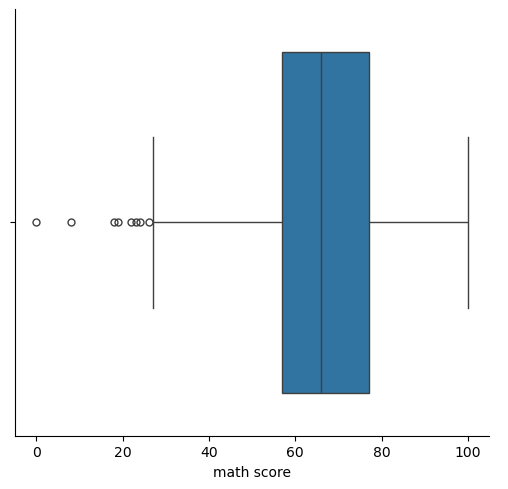

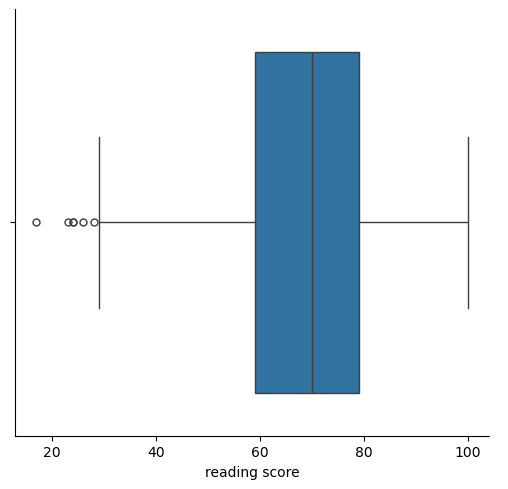

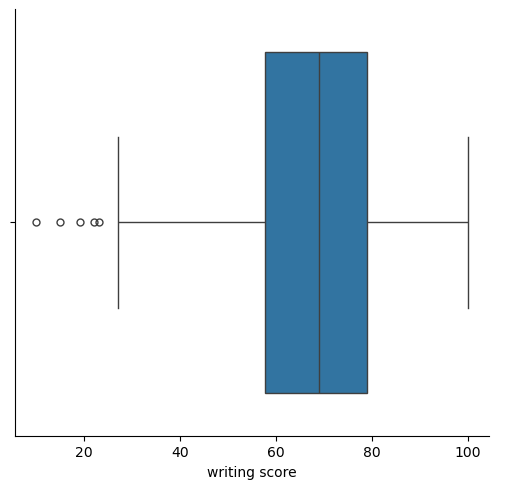

In [25]:
sns.catplot(x = 'math score', kind = 'box', data=df1),sns.catplot(x = 'reading score', kind = 'box', data = df1), 
sns.catplot(x = 'writing score', kind = 'box', data = df1)